In [2]:

import fitz  # PyMuPDF
import os

def pdf_to_txt(pdf_path, txt_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text()
    with open(txt_path, "w", encoding="utf-8") as f:
        f.write(text)

def batch_convert(pdf_dir, txt_dir):
    os.makedirs(txt_dir, exist_ok=True)

    for root, _, files in os.walk(pdf_dir):
        for file in files:
            if file.endswith(".pdf"):

                # 判断是否为深度报告
                is_deep = "深度报告" in root

                pdf_path = os.path.join(root, file)

                # ✅ 构造新的目标目录，而不是修改 txt_dir 本身
                if is_deep:
                    target_dir = os.path.join(txt_dir, "深度报告")
                else:
                    target_dir = txt_dir

                os.makedirs(target_dir, exist_ok=True)

                # ✅ txt_path 也基于 target_dir，而不是 txt_dir
                txt_path = os.path.join(target_dir, file.replace(".pdf", ".txt"))

                print(f"正在转换: {pdf_path}")
                pdf_to_txt(pdf_path, txt_path)


In [ ]:
batch_convert("C:\\Users\\Administrator\\Desktop\\MFIN\\7036\\East_money_research_report_download\\reports_pdf", "reports_txt")


正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_report_download\reports_pdf\TCL中环\20171129_华鑫证券_TCL中环_收购国电光伏90%股权，单晶龙头复牌归来.pdf
正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_report_download\reports_pdf\TCL中环\20180315_华鑫证券_TCL中环_与中科院微电子所签署战略框架协议，半导体业务持续推进.pdf
正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_report_download\reports_pdf\TCL中环\20180824_粤开证券_TCL中环_【联讯电新中报点评】中环股份：费用上升影响利润增速，期待大硅片贡献业绩.pdf
正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_report_download\reports_pdf\TCL中环\20190108_粤开证券_TCL中环_【联讯电新公司点评】：非公开发行助力大硅片扩产顺利实施.pdf
正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_report_download\reports_pdf\TCL中环\20190130_粤开证券_TCL中环_【联讯电新公司点评】中环股份：业绩上修为预增，硅片提价利好未来业绩.pdf
正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_report_download\reports_pdf\TCL中环\20190401_粤开证券_TCL中环_【联讯电新公司点评】：中环股份：业绩符合预期，产能顺利释放助公司成长.pdf
正在转换: C:\Users\Administrator\Desktop\MFIN\7036\East_money_research_re

In [4]:
txt_dir = "reports_txt"
output_dir = "reports_txt_by_quarter"
for root, _, files in os.walk(txt_dir):
        for file in files:
            if not file.endswith(".txt"):
                continue

            # 提取日期
            date_str = file[:8]
            if not date_str.isdigit():
                print(f"跳过无法识别日期的文件: {file}")
                continue
            # 提取股票名（父目录名）
            stock_name = file.split("_")[2]
            print(stock_name)


In [5]:
import os
import shutil
import re

def get_quarter(date_str):
    month = int(date_str[4:6])
    year = date_str[:4]
    if 1 <= month <= 3:
        return f"{year}_Q1"
    elif 4 <= month <= 6:
        return f"{year}_Q2"
    elif 7 <= month <= 9:
        return f"{year}_Q3"
    else:
        return f"{year}_Q4"

def extract_stock_name(file, root):
    # 尝试从文件名结构中提取
    parts = file.replace(".txt", "").split("_")
    if len(parts) >= 3 and parts[0].isdigit():
        return parts[2]
    # 否则从路径中提取父目录名
    return os.path.basename(os.path.dirname(root))

def normalize_stock_name(name):
    name = name.strip()
    name = re.sub(r"[^\u4e00-\u9fa5A-Za-z0-9]", "", name)
    return name

def organize_txt_by_quarter_with_depth(txt_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for root, _, files in os.walk(txt_dir):
        for file in files:
            if not file.endswith(".txt"):
                continue

            # 提取日期
            date_str = file[:8]
            if not date_str.isdigit():
                print(f"跳过无法识别日期的文件: {file}")
                continue

            # 判断季度
            quarter_folder = get_quarter(date_str)

            # 判断是否为深度报告
            is_deep = "深度报告" in root

            # 提取股票名
            stock_name = normalize_stock_name(extract_stock_name(file, root))
            if not stock_name:
                print(f"跳过无法识别股票名的文件: {file}")
                continue

            # 构建目标路径
            target_dir = os.path.join(output_dir, quarter_folder, stock_name)
            if is_deep and "深度报告" not in stock_name:  # 防止嵌套
                target_dir = os.path.join(target_dir, "深度报告")

            os.makedirs(target_dir, exist_ok=True)

            # 移动文件
            src = os.path.join(root, file)
            dst = os.path.join(target_dir, file)
            shutil.move(src, dst)

            print(f"✓ 已移动: {file} → {target_dir}")


In [6]:
# import os
# import shutil

# def organize_txt_by_quarter(txt_dir, output_dir):
#     os.makedirs(output_dir, exist_ok=True)

#     for root, _, files in os.walk(txt_dir):
#         for file in files:
#             if not file.endswith(".txt"):
#                 continue

#             # 提取日期（文件名前 8 位）
#             date_str = file[:8]
#             if not date_str.isdigit():
#                 print(f"跳过无法识别日期的文件: {file}")
#                 continue

#             # 获取季度文件夹名
#             quarter_folder = get_quarter(date_str)
#             quarter_path = os.path.join(output_dir, quarter_folder)
#             os.makedirs(quarter_path, exist_ok=True)

#             # 移动文件
#             src = os.path.join(root, file)
#             dst = os.path.join(quarter_path, file)
#             shutil.move(src, dst)

#             print(f"已移动: {file} → {quarter_folder}")


In [7]:
organize_txt_by_quarter_with_depth("reports_txt", "reports_txt_by_quarter")

In [8]:
import os

RATING_KEYWORDS = {
    "买入": ["买入", "强烈推荐", "推荐", "买进"],
    "增持": ["增持", "继续增持"],
    "中性": ["中性", "持有", "观望"],
    "减持": ["减持"],
    "卖出": ["卖出"]
}

def extract_rating_from_text(text):
    text = text.replace(" ", "").replace("\n", "")
    for rating, keywords in RATING_KEYWORDS.items():
        for kw in keywords:
            if kw in text:
                return rating
    return "未提及"

def classify_reports_by_rating(base_dir):
    result = {}

    for quarter in os.listdir(base_dir):
        quarter_path = os.path.join(base_dir, quarter)
        if not os.path.isdir(quarter_path):
            continue

        result[quarter] = {}

        for stock in os.listdir(quarter_path):
            stock_path = os.path.join(quarter_path, stock)
            if not os.path.isdir(stock_path):
                continue

            result[quarter][stock] = []

            for root, _, files in os.walk(stock_path):
                for file in files:
                    if not file.endswith(".txt"):
                        continue

                    txt_path = os.path.join(root, file)
                    with open(txt_path, "r", encoding="utf-8", errors="ignore") as f:
                        text = f.read()

                    rating = extract_rating_from_text(text)
                    result[quarter][stock].append((file, rating))

    return result


In [9]:
result = classify_reports_by_rating("reports_txt_by_quarter")


In [10]:
import pandas as pd
df = pd.read_csv('East_money_research_report_download/HS300.csv', dtype=str)
stock_list = df['股票简称']


In [11]:
df

序号    股票代码   股票简称  主营行业
0      1  688981   中芯国际  电子设备
1      2  688599   天合光能  电气设备
2      3  688506   百利天恒  医药生物
3      4  688472    阿特斯  电子设备
4      5  688396    华润微  电子设备
..   ...     ...    ...   ...
295  296  000157   中联重科  机械设备
296  297  000100  TCL科技  电子设备
297  298  000063   中兴通讯  信息技术
298  299  000002    万科A   房地产
299  300  000001   平安银行    金融

[300 rows x 4 columns]

In [12]:
print(type(result.keys()))

<class 'dict_keys'>


In [13]:
result

{}

In [14]:
import pandas as pd

def compute_full_quarterly_scores(result, stock_list):
    quarterly_scores = {}

    for quarter in result.keys():
        quarterly_scores[quarter] = {}

        for stock in stock_list:
            reports = result[quarter].get(stock, [])

            scores = []
            for filename, rating in reports:
                score = RATING_SCORE.get(rating)
                if score is not None:
                    scores.append(score)

            if len(scores) == 0:
                avg_score = 0   # ✅ 无研报 → 默认 0
            else:
                avg_score = sum(scores) / len(scores)

            quarterly_scores[quarter][stock] = avg_score

    return quarterly_scores


In [15]:
RATING_SCORE = {
    "买入": 2,
    "增持": 1,
    "中性": 0,
    "减持": -1,
    "卖出": -2,
    "未提及": None  # 不计入平均
}


In [16]:
scores = compute_full_quarterly_scores(result,stock_list)



In [17]:
scores

{}

In [18]:
def scores_to_df(scores):
    rows = []
    for quarter, stocks in scores.items():
        for stock, score in stocks.items():
            rows.append([quarter, stock, score])
    df = pd.DataFrame(rows, columns=["quarter", "stock", "score"])
    return df.pivot(index="quarter", columns="stock", values="score")


In [19]:
df_scores = scores_to_df(scores)
print(type(df_scores))

<class 'pandas.core.frame.DataFrame'>


In [20]:
df_scores

Empty DataFrame
Columns: []
Index: []

In [21]:
# 构建简称 → 代码 的映射字典
name_to_code = dict(zip(df["股票简称"], df["股票代码"]))

# 替换 df_scores 的列名
df_scores = df_scores.rename(columns=name_to_code)


In [22]:
df_scores= df_scores.replace(0, 0.1)


In [23]:
# import os
# import pandas as pd

# def load_selected_stock_data(data_dir, stock_list):
#     stock_data = {}

#     for stock in stock_list:
#         code = name_to_code.get(stock)
#         file_path = os.path.join(data_dir, f"{code}.csv")
#         print(file_path)
#         if os.path.exists(file_path):
#             df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)
#             stock_data[code] = df
#         else:
#             print(f"未找到数据文件: {code}.csv")

#     return stock_data


In [24]:
import os
import pandas as pd

def load_selected_stock_data(data_dir, stock_list):
    dfs = []

    for stock in stock_list:
        code = name_to_code.get(stock)
        file_path = os.path.join(data_dir, f"{code}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)
            df["股票代码"] = code  # ✅ 添加股票代码列
            dfs.append(df)
        else:
            print(f"未找到数据文件: {code}.csv")

    if len(dfs) == 0:
        return pd.DataFrame()  # ✅ 防止空列表报错

    return pd.concat(dfs, ignore_index=True)


In [25]:
data_dir = "trading_data"  # 替换为你的路径
selected_data = load_selected_stock_data(data_dir, stock_list)


In [26]:
selected_data = selected_data.dropna(subset=["交易日期"])


In [27]:
print(type(selected_data['交易日期'][0]))

<class 'numpy.float64'>


In [28]:
selected_data["交易日期"] = (
    selected_data["交易日期"]
    .astype(str)                     # 全部转成字符串
    .str.split(".").str[0]           # 去掉 float 的 .0
)

selected_data["交易日期"] = pd.to_datetime(
    selected_data["交易日期"],
    format="%Y%m%d",
    errors="coerce"
)

In [29]:
selected_data["quarter"] = selected_data["交易日期"].dt.to_period("Q").astype(str)

first_trade_dates = (
    selected_data.groupby("quarter")["交易日期"]
    .min()
    .reset_index()
    .rename(columns={"交易日期": "rebalance_date"})
)


In [30]:
df_scores_long = df_scores.stack().reset_index()
df_scores_long.columns = ["quarter", "股票代码", "score"]


In [31]:
rebalance_prices = selected_data.merge(
    first_trade_dates,
    on=["quarter"],
    how="inner"
)

rebalance_prices = rebalance_prices[
    rebalance_prices["交易日期"] == rebalance_prices["rebalance_date"]
][["quarter", "股票代码", "收盘价"]]

rebalance_prices = rebalance_prices.rename(columns={"收盘价": "price_in"})


In [32]:
rebalance_prices

quarter    股票代码  price_in
41       2025Q4  688981    138.91
101      2025Q3  688981     87.76
161      2025Q2  688981     86.50
218      2025Q1  688981     89.96
279      2024Q4  688981     71.99
...         ...     ...       ...
1152561  2001Q1  000001     14.55
1152621  2000Q4  000001     16.75
1152686  2000Q3  000001     17.74
1152745  2000Q2  000001     18.28
1152799  2000Q1  000001     18.29

[18986 rows x 3 columns]

In [33]:
last_trade_dates = (
    selected_data.groupby(["quarter", "股票代码"])["交易日期"]
    .max()
    .reset_index()
    .rename(columns={"交易日期": "exit_date"})
)

exit_prices = selected_data.merge(
    last_trade_dates,
    left_on=["quarter", "股票代码", "交易日期"],
    right_on=["quarter", "股票代码", "exit_date"],
    how="inner"
)[["quarter", "股票代码", "收盘价"]]

exit_prices = exit_prices.rename(columns={"收盘价": "price_out"})


In [34]:
df_scores_long["quarter"] = df_scores_long["quarter"].str.replace("_", "", regex=False)


In [35]:
df_scores_long


Empty DataFrame
Columns: [quarter, 股票代码, score]
Index: []

In [36]:
data_full = rebalance_prices.merge(df_scores_long, on=["quarter", "股票代码"], how="left")
data_full = data_full.merge(exit_prices, on=["quarter", "股票代码"], how="left")


In [37]:
data_full = data_full.dropna()

In [38]:
data_full

Empty DataFrame
Columns: [quarter, 股票代码, price_in, score, price_out]
Index: []

In [39]:
data_full["return"] = (data_full["price_out"] - data_full["price_in"]) / data_full["price_in"]


In [40]:
def normalize_weights(group):
    s = group["score"]
    return s / s.abs().sum()

data_full["weight"] = data_full.groupby("quarter").apply(normalize_weights).reset_index(level=0, drop=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_285684\3754490313.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_full["weight"] = data_full.groupby("quarter").apply(normalize_weights).reset_index(level=0, drop=True)


ValueError: Cannot set a DataFrame with multiple columns to the single column weight

In [ ]:
data_full["weighted_return"] = data_full["weight"] * data_full["return"]
quarterly_returns = data_full.groupby("quarter")["weighted_return"].sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_141900\1043144826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full["weighted_return"] = data_full["weight"] * data_full["return"]


In [ ]:
quarterly_returns

quarter
2017Q1    0.057029
2017Q2   -0.010070
2017Q3    0.063344
2017Q4    0.068051
2018Q1   -0.028453
2018Q2   -0.110614
2018Q3    0.011611
2018Q4   -0.036803
2019Q1    0.311602
2019Q2   -0.082400
2019Q3    0.005167
2019Q4    0.081918
2020Q1   -0.079570
2020Q2    0.093226
2020Q3    0.117247
2020Q4    0.123740
2021Q1    0.017438
2021Q2    0.033891
2021Q3    0.098747
2021Q4    0.008184
2022Q1   -0.119357
2022Q2    0.033651
2022Q3   -0.081052
2022Q4    0.041392
2023Q1    0.100233
2023Q2   -0.030617
2023Q3   -0.052791
2023Q4   -0.038491
2024Q1    0.074407
2024Q2   -0.011569
2024Q3    0.113933
2024Q4   -0.087968
2025Q1    0.024837
2025Q2   -0.006968
2025Q3    0.149810
2025Q4   -0.036165
Name: weighted_return, dtype: float64

In [ ]:
cumulative_return = (1 + quarterly_returns).cumprod()
sharpe_ratio = quarterly_returns.mean() / quarterly_returns.std()


In [ ]:
sharpe_ratio

np.float64(0.261317280916764)

In [ ]:
HS300_index = pd.read_csv('C:\\Users\\Administrator\\Desktop\\MFIN\\7036\\trading_data\\沪深300.csv', dtype=str)


In [ ]:
HS300_index

股票代码      交易日期        开盘价        最高价        最低价        收盘价  \
0     000300.SH  20251205  4547.9056  4593.8279  4535.0195  4584.5368   
1     000300.SH  20251204  4533.6004  4557.4228  4514.1878  4546.5664   
2     000300.SH  20251203  4554.5894   4569.821  4523.5017  4531.0486   
3     000300.SH  20251202  4571.9098  4575.4945  4539.4312  4554.3347   
4     000300.SH  20251201  4539.1877  4576.9654  4531.2917  4576.4856   
...         ...       ...        ...        ...        ...        ...   
5078  000300.SH  20050110     983.76    993.959    979.789    993.879   
5079  000300.SH  20050107    983.045    995.711    979.812    983.958   
5080  000300.SH  20050106    993.331    993.788     980.33    983.174   
5081  000300.SH  20050105    981.577    997.323    979.877    992.564   
5082  000300.SH  20050104    994.769    994.769    980.658    982.794   

           前收盘价       涨跌额  涨跌幅(%)       成交量(手)  ...    当日总市值(十万元)  \
0     4546.5664   37.9704   0.84%  196799968.0  ...  664680584.48   
1     4531.0486   15.5178   0.34%  147198110.0  ...  661713377.81   
2     4554.3347  -23.2861  -0.51%  169762790.0  ...  660723560.09   
3     4576.4856  -22.1509  -0.48%  148493132.0  ...  664633350.45   
4     4526.6616    49.824   1.10%  200382317.0  ...  666282304.33   
...         ...       ...     ...          ...  ...           ...   
5078    983.958     9.921   1.01%   5791697.99  ...           NaN   
5079    983.174     0.784   0.08%   7298694.09  ...           NaN   
5080    992.564     -9.39  -0.95%   6288029.05  ...           NaN   
5081    982.794      9.77   0.99%   7119108.98  ...           NaN   
5082     1000.0   -17.206  -1.72%   7412868.94  ...           NaN   

       当日流通市值(十万元)     当日总股本(万股)    当日流通股本(万股)  当日自由流通股本(万股) 换手率(%)  \
0      509550961.9  432779417.25  327708804.29  110329585.08    0.6   
1     506944282.71  432779480.67  327708867.71   110329648.5   0.45   
2     506078400.84  432778589.88  327708791.56  110327630.38   0.52   
3     508603875.34  432775087.95  327708746.72  110327585.53   0.45   
4     510106604.09  432675292.69  327709113.68  110327952.49   0.61   
...            ...           ...           ...           ...    ...   
5078           NaN           NaN           NaN           NaN    NaN   
5079           NaN           NaN           NaN           NaN    NaN   
5080           NaN           NaN           NaN           NaN    NaN   
5081           NaN           NaN           NaN           NaN    NaN   
5082           NaN           NaN           NaN           NaN    NaN   

     换手率(自由流通股)    市盈率 市盈率(TTM)   市净率  
0          1.78  14.62    14.02  1.46  
1          1.33  14.56    13.96  1.45  
2          1.54  14.53    13.94  1.42  
3          1.35  14.62    14.02  1.46  
4          1.82  14.66    14.05  1.46  
...         ...    ...      ...   ...  
5078        NaN    NaN      NaN   NaN  
5079        NaN    NaN      NaN   NaN  
5080        NaN    NaN      NaN   NaN  
5081        NaN    NaN      NaN   NaN  
5082        NaN    NaN      NaN   NaN  

[5083 rows x 21 columns]

In [ ]:
hs300.shape

(0, 22)

(2168, 21)
===== 沪深300指数表现（2017–2025）=====
年化收益率: 3.52%
年化波动率: 18.67%
夏普比率: 0.188
累计收益率: 36.11%

每年收益率：
年份
2017    0.196699
2018   -0.263431
2019    0.379536
2020    0.255054
2021   -0.062142
2022   -0.212725
2023   -0.117490
2024    0.161991
2025    0.200016
Name: 收盘价, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_141900\4184583347.py:90: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_141900\4184583347.py:90: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_141900\4184583347.py:90: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_141900\4184583347.py:90: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_141900\4184583347.py:90: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykerne

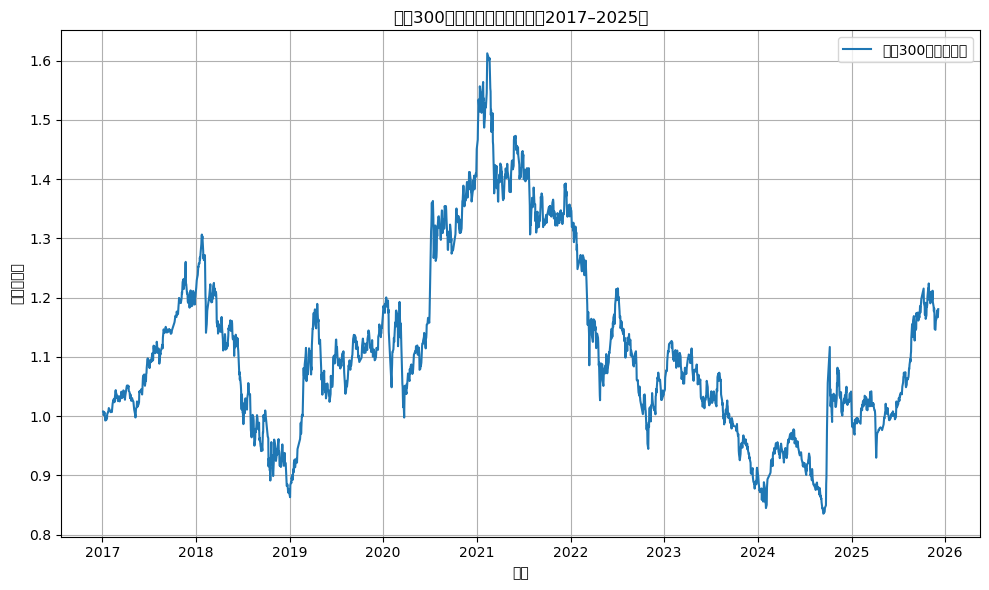

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 复制原始数据，避免修改源数据
hs300 = HS300_index.copy()

hs300["收盘价"] = hs300["收盘价"].astype(float)
# -----------------------------
# 1. 日期处理
# -----------------------------
hs300["交易日期"] = pd.to_datetime(
    hs300["交易日期"].astype(str).str.split(".").str[0],
    format="%Y%m%d",
    errors="coerce"
)

hs300 = hs300.dropna(subset=["交易日期"])
hs300 = hs300.sort_values("交易日期")

# -----------------------------
# 2. 筛选 2017–2025
# -----------------------------
hs300 = hs300[
    (hs300["交易日期"] >= "2017-01-01") &
    (hs300["交易日期"] <= "2025-12-31")
].copy()

print(hs300.shape)
# -----------------------------
# 3. 如果没有 log_return 列，则自动生成
# -----------------------------
if "log_return" not in hs300.columns:
    hs300["log_return"] = np.log(hs300["收盘价"] / hs300["收盘价"].shift(1))

hs300 = hs300.dropna(subset=["log_return"])

# -----------------------------
# 4. 年化收益率
# -----------------------------
total_days = (hs300["交易日期"].iloc[-1] - hs300["交易日期"].iloc[0]).days
years = total_days / 365.25

cumulative_return = hs300["收盘价"].iloc[-1] / hs300["收盘价"].iloc[0]
annual_return = cumulative_return ** (1 / years) - 1

# -----------------------------
# 5. 年化波动率
# -----------------------------
daily_volatility = hs300["log_return"].std()
annual_volatility = daily_volatility * np.sqrt(252)

# -----------------------------
# 6. 夏普比率（无风险利率=0）
# -----------------------------
sharpe_ratio = annual_return / annual_volatility

# -----------------------------
# 7. 累计收益率曲线
# -----------------------------
hs300["累计收益率"] = (1 + hs300["log_return"]).cumprod()

# -----------------------------
# 8. 每年收益率
# -----------------------------
hs300["年份"] = hs300["交易日期"].dt.year
yearly_return = hs300.groupby("年份")["收盘价"].apply(lambda x: x.iloc[-1] / x.iloc[0] - 1)

# -----------------------------
# 9. 输出结果
# -----------------------------
print("===== 沪深300指数表现（2017–2025）=====")
print(f"年化收益率: {annual_return:.2%}")
print(f"年化波动率: {annual_volatility:.2%}")
print(f"夏普比率: {sharpe_ratio:.3f}")
print(f"累计收益率: {cumulative_return - 1:.2%}")
print("\n每年收益率：")
print(yearly_return)

# -----------------------------
# 10. 绘制累计收益率曲线
# -----------------------------
plt.figure(figsize=(10, 6))
plt.plot(hs300["交易日期"], hs300["累计收益率"], label="沪深300累计收益率")
plt.title("沪深300指数累计收益率曲线（2017–2025）")
plt.xlabel("日期")
plt.ylabel("累计收益率")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
